<a href="https://colab.research.google.com/github/akshegde4/CIFAKE/blob/main/CIFAKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [18]:
!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

 99% 104M/105M [00:05<00:00, 25.8MB/s]
100% 105M/105M [00:05<00:00, 21.0MB/s]


In [19]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cifake-real-and-ai-generated-synthetic-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
#Imported CIFAKE dataset from kaggle

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [63]:
#generator

train_ds=tf.keras.utils.image_dataset_from_directory(directory = '/content/train',image_size=(32,32))
test_ds=tf.keras.utils.image_dataset_from_directory(directory='/content/test',image_size=(32,32))

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [64]:
from keras.layers import Flatten
resnet_model = Sequential()

#Using pretrained resent101 model
pretrained_model=tf.keras.applications.ResNet50(
                                                 include_top=False,
                                                    weights="imagenet",
                                                    input_tensor=None,
                                                    input_shape=(32,32,3),
                                                    pooling='max',
                                                    classes=2
)
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())

resnet_model.add(Dense(32,activation='relu'))
resnet_model.add(Dense(1,activation='sigmoid'))


In [65]:
resnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 module_wrapper_27 (ModuleW  (None, 32)                65568     
 rapper)                                                         
                                                                 
 module_wrapper_28 (ModuleW  (None, 1)                 33        
 rapper)                                                         
                                                                 
Total params: 23653313 (90.23 MB)
Trainable params: 65601 (256.25 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [66]:
from keras.src.metrics import accuracy
from keras.src.metrics.probabilistic_metrics import binary_crossentropy
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(
    learning_rate=0.001),loss='binary_crossentropy',metrics=[accuracy])

In [67]:
history = resnet_model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
3125/3125 [==============================] - 58s 17ms/step - loss: 0.3060 - accuracy: 0.0000e+00 - val_loss: 0.2753 - val_accuracy: 0.0000e+00
Epoch 2/10
3125/3125 [==============================] - 51s 16ms/step - loss: 0.2493 - accuracy: 2.0000e-05 - val_loss: 0.2594 - val_accuracy: 5.0000e-05
Epoch 3/10
3125/3125 [==============================] - 52s 17ms/step - loss: 0.2256 - accuracy: 1.5000e-04 - val_loss: 0.2542 - val_accuracy: 3.0000e-04
Epoch 4/10
3125/3125 [==============================] - 51s 16ms/step - loss: 0.2082 - accuracy: 2.5000e-04 - val_loss: 0.2508 - val_accuracy: 2.5000e-04
Epoch 5/10
3125/3125 [==============================] - 51s 16ms/step - loss: 0.1930 - accuracy: 8.5000e-04 - val_loss: 0.2653 - val_accuracy: 0.0016
Epoch 6/10
3125/3125 [==============================] - 51s 16ms/step - loss: 0.1801 - accuracy: 0.0019 - val_loss: 0.2611 - val_accuracy: 0.0025
Epoch 7/10
3125/3125 [==============================] - 52s 17ms/step - loss: 0.1670 - a

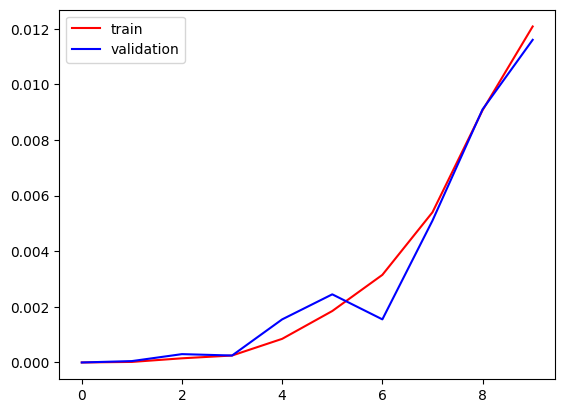

In [68]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

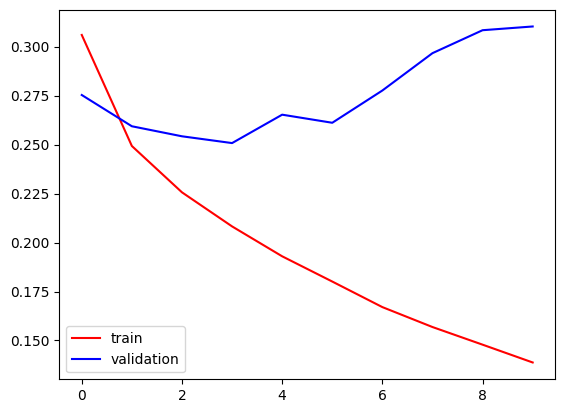

In [69]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()